In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

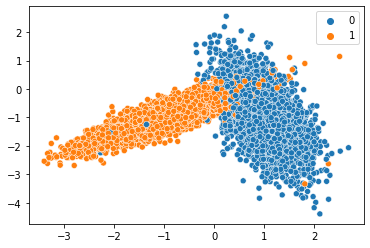

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)
plt.show()

In [ ]:
## This function splits the indices into 3(folds) equal parts
def split_indices(indices,folds):
  splited_indices = []
  indices_len_per_part = int(len(indices)/folds)
  
  start_index = 0
  for i in range(folds): 
    end_index = (i+1) * indices_len_per_part
    splited_indices.append(list(indices[start_index : end_index]))
    start_index = end_index

  return splited_indices

In [ ]:
## This function returns a tuple of test and train indicies => (test_indices, train_indicies)
## for every iteration of folds
def get_train_and_cv_indices(indices,folds,j):
  splited_indices = split_indices(indices,folds)

  folds_range = list(range(folds))
  #print(j)
  test_data = splited_indices[folds_range[j]]
  folds_range.remove(j)
  
  train_data = []
  for f in folds_range:
    train_data.extend(splited_indices[f])

  return (train_data,test_data) 


In [ ]:
## This function generates random numbers(sized) between 'a' and 'b' 
from random import sample

def generate_hyperparameters_set(a,b,size):
  l = [ i for i in range(a,b+1) ] 
  return sorted(list(sample(l,size)))

generate_hyperparameters_set(1,50,10)

[3, 4, 8, 9, 14, 15, 17, 30, 32, 36]

In [ ]:
## This function returns  train scores and test scores for each hyperparameter value

from sklearn.metrics import accuracy_score

def RandSearch(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []
    indices = list(range(len(x_train)))    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):

            train_indices = get_train_and_cv_indices(indices,folds,j)[0]
            test_indices = get_train_and_cv_indices(indices,folds,j)[1]
            
           
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


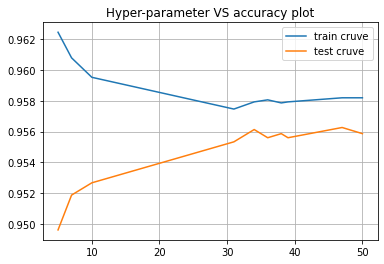

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':generate_hyperparameters_set(1,50,10)} 
folds = 3

trainscores,testscores = RandSearch(X_train, y_train, neigh, params, folds)

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.grid()
plt.legend()
plt.show()

In [ ]:
k_dict = {}
for i in range(len(params['n_neighbors'])):
  print("For k={0}\n Train score = {1}\n CV score = {2}\n Train_Test_diff = {3}\n".format( params['n_neighbors'][i] , trainscores[i], testscores[i], trainscores[i] - testscores[i]) )

  k_dict[params['n_neighbors'][i]] = [trainscores[i], testscores[i], trainscores[i] - testscores[i]]


best_k = sorted(k_dict, key= lambda x: k_dict[x][2] if k_dict[x][2] >= 0 else 9999)[0]
print("*"*50)
print("Best K for KNN after RandomSearchCV --> {0}".format(best_k))

For k=5
 Train score = 0.9624666666666667
 CV score = 0.9495999999999999
 Train_Test_diff = 0.012866666666666804

For k=7
 Train score = 0.9608
 CV score = 0.9518666666666666
 Train_Test_diff = 0.008933333333333349

For k=10
 Train score = 0.9595333333333333
 CV score = 0.9526666666666667
 Train_Test_diff = 0.006866666666666688

For k=31
 Train score = 0.9574666666666666
 CV score = 0.9553333333333334
 Train_Test_diff = 0.0021333333333332094

For k=34
 Train score = 0.9579333333333334
 CV score = 0.9561333333333333
 Train_Test_diff = 0.0018000000000001348

For k=36
 Train score = 0.9580666666666667
 CV score = 0.9556
 Train_Test_diff = 0.002466666666666728

For k=38
 Train score = 0.9578666666666665
 CV score = 0.9558666666666666
 Train_Test_diff = 0.0019999999999998908

For k=39
 Train score = 0.9579333333333334
 CV score = 0.9556
 Train_Test_diff = 0.0023333333333334094

For k=47
 Train score = 0.9582
 CV score = 0.9562666666666667
 Train_Test_diff = 0.0019333333333333425

For k=50
 